In [32]:
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider



In [26]:
def plot_data_distributions_interactive(values, data, com, fwhm, motor_name):
    num_pixels_x, num_pixels_y = data.shape[1], data.shape[2]  # Assuming 3D array [values, x, y]
    
    def update_plot(pixel_x, pixel_y):
        # Prepare the plot for a single pixel
        fig, ax = plt.subplots(figsize=(6, 6))
        fig.suptitle(f"Angle distributions of {motor_name}")
        ax.scatter(values, data[:, pixel_x, pixel_y], color='b')
        ax.axvline(com[pixel_x, pixel_y], color='k', linestyle='--', label='Center of Mass')
        ax.axvspan(com[pixel_x, pixel_y] - fwhm[pixel_x, pixel_y] / 2, com[pixel_x, pixel_y] + fwhm[pixel_x, pixel_y] / 2, color='green', alpha=0.3, label='FWHM')
        
        # Set labels and title
        ax.set_xlabel(motor_name)
        ax.set_ylabel('Intensities')
        ax.legend()
        plt.show()

    # Create interactive sliders to select pixel coordinates
    interact(update_plot,
             pixel_x=IntSlider(min=0, max=num_pixels_x-1, step=1, value=0, description='Pixel X'),
             pixel_y=IntSlider(min=0, max=num_pixels_y-1, step=1, value=0, description='Pixel Y'))

def plot_center_of_mass(chi_com, phi_com):
    chi_com_norm = (chi_com - np.nanmin(chi_com)) / (np.nanmax(chi_com) - np.nanmin(chi_com))
    phi_com_norm = (phi_com - np.nanmin(phi_com)) / (np.nanmax(phi_com) - np.nanmin(phi_com))
    fig, ax = plt.subplots(1,2,figsize=(12, 6))
    fig.suptitle(f"Center of Mass")
    ax[0].imshow(chi_com_norm,cmap=plt.cm.viridis)
    ax[0].set_title('Chi')
    ax[1].imshow(phi_com_norm, cmap=plt.cm.viridis)
    ax[1].set_title('Phi')
    plt.show()

In [16]:
# Load the data
dic = r"/dtu/3d-imaging-center/projects/2022_QIM_PMP/analysis/Johann_Haack"
path = os.path.join(dic, "raw_data_fitting.h5")
file = h5py.File(path)
chi_values = file["motorchi/values"][:]
phi_values = file["motordiffry/values"][:]
chi_data = file["motorchi/running_data"][:]
phi_data = file["motordiffry/running_data"][:]
chi_com = file["motorchi/com"][:]
phi_com = file["motordiffry/com"][:]
chi_fwhm = file["motorchi/fwhm"][:]
phi_fwhm = file["motordiffry/fwhm"][:]

In these plots we take the smoothed center of mass and full width half maximum, this makes total sense to get rid of outliers and as we want to describe the change over the pixels.

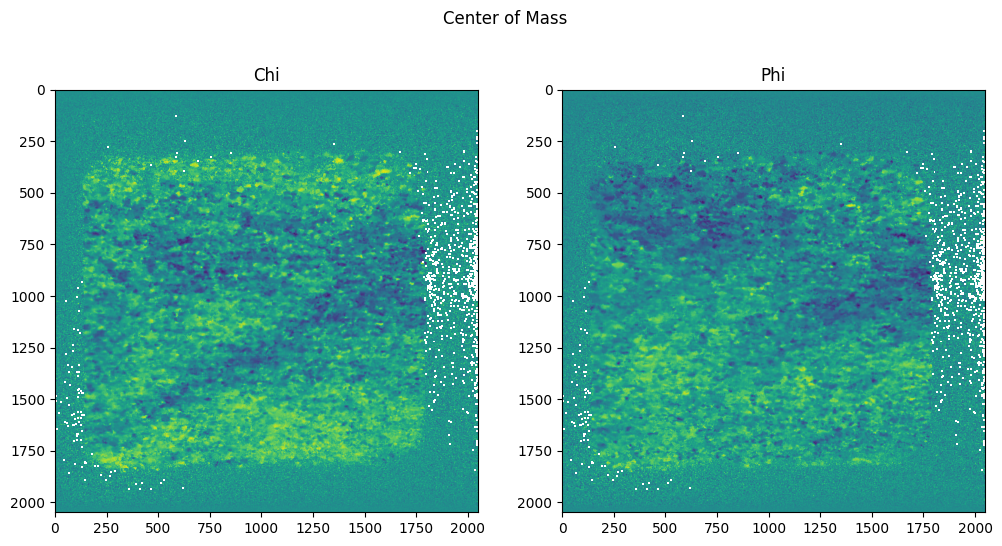

In [27]:
plot_center_of_mass(chi_com, phi_com)

In [17]:
plot_data_distributions_interactive(chi_values, chi_data,chi_com,chi_fwhm,'Chi')

interactive(children=(IntSlider(value=0, description='Pixel X', max=2047), IntSlider(value=0, description='Pix…

<h3>Comparison of average and fitting as a change Paramter of the two motors for Intensity and KAM</h3>